<a href="https://colab.research.google.com/github/LucasFerraroCardoso/TrabalhoAplicacaoAG/blob/main/Tarefa_AG_IRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook da Tarefa Final de aplicação

## Index

[Descricao da Proposta](#scrollTo=48alzOyxX5r4)

[Tabela de Parametros do AG](#scrollTo=Lwf6zWRJd2Oh)

[O individuo (cromossomo)](#scrollTo=48alzOyxX5r4)

[Conversão do cromossomo para pesos](#scrollTo=MOfdY4DNmb5Q)

[Por que usar a TRI?](#scrollTo=BOPOVxy3nW4E)

[Estimação dos parametros da TRI no AG](#scrollTo=_mSQU-KupBIU)

[Calculo do Fitness](#scrollTo=RnwyXeboVVCj)

[Mutacao adaptativa pela TRI](#scrollTo=SEpnJ299Wrzg)

[Avaliação do desempenho do AutoML com AG e TR](#scrollTo=-WpDUcmFX9a6)

[Sobre o dataset escolhido](#scrollTo=F-J9LGiGZq2B)

[Importa as bibliotecas necessarias](#scrollTo=CEok_4FF1JBd)

[Algoritmo Genetico](#scrollTo=rx0sTJh6__6Y)

- [Funções gerais do AG](#scrollTo=N5xS_Il919a4)
- [Experimento com o dataset Banknote](#scrollTo=NHllNVq3Z2GO)
- [Grafico de Convergencia do AG](#scrollTo=85DzUaK5tVVb)
- [Tabela Final com o Fitness encontrado para cada população](#scrollTo=JwX2p8WJhg5P)

[Teste comparacao do modelo Final encontrado pelo AG com um modelo treinado normalmente](#scrollTo=O8284lXNhplR)

[Teste com o AutoKeras](#scrollTo=hhtto2xHbRKE)

[Consideraçoes Finais](#scrollTo=_fVaOzi8mAdH)

# Descricao da Proposta

Resumidamente, objetivo é utilizar a capacidade evolucionária dos algoritmos genéticos para criar um algoritmo de AutoML, onde os indivíduos serão modelos de Redes Neurais sendo os genes os pesos da rede. A avaliação dos individuos será feita via o cálculo e conceitos da [Teoria de Resposta ao Item](https://pt.wikipedia.org/wiki/Teoria_de_resposta_ao_item), além disso os resultados da TRI também são utilizados para realizar a mutação adaptativa.

# Tabela de Parametros do AG

|           Parâmetro           |                    Descrição                   |
|:-----------------------------:|:----------------------------------------------:|
|         Representação         | Cada gene do cromossomo é um número tipo float |
|           Cruzamento          |         Cruzamento aritmético com corte        |
| Probabilidade de Recombinação |                      80%                      |
|            Mutação            |                Mutação Gaussiana               |
|    Probabilidade de Mutação   |       Mutação adaptativa pela TRI com queda exponencial      |
|        Seleção de Pais        |                     Torneio                    |
|    Seleção de Sobreviventes   |               Ficam só os filhos               |
|       Número de gerações      |               Não foi determinado              |
|      Tamanho da população     |                  20, 30 e 50                  |
|         Inicialização         |                    Aleatória                   |
|       Critério de Parada      |              Parada por estagnação ou caso atinja um valor máximo esperado             |
| Fitness | O Fitness é calculado segundo os parametros de item e habilidade dos modelos |

# O individuo (cromossomo)

Os indivíduos serão uma lista de pesos que compôe a Rede Neural. Todas as redes serão simples com apenas 3 camadas. A quantidade de neurônios na rede são definidos de acordo com o dataset que se deseja classificar. A imagem abaixo representa um exemplo de um indivíduo.

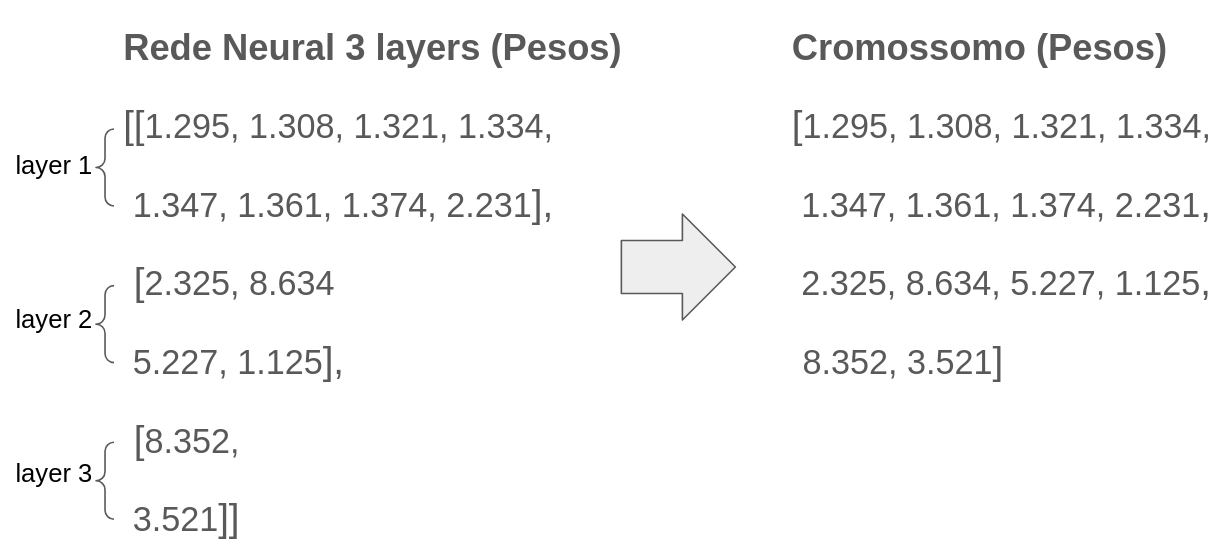

# Conversão do cromossomo para pesos

Dentro do algoritmo genético todos os genes são valores gerados entre 0 e 1. Para utilizar esses valores como pesos de uma Rede Neural, são calculados limites superior e inferior de cada camada da NN utilizando a inicialização de Xavier.

# Por que usar a TRI?

A TRI é um conjunto de modelos matemáticos que servem para calcular a proficiencia de um indíviduo por meio de um teste. A TRI foi desenvolvida para ser capaz de avaliar o desemepenho de um indivíduo diretamente sobre um item e não sobre todo o teste como comumente é feito na Teoria Clássica dos Testes. Semelhantemente, o mesmo ocorre em ML onde as metricas classicas de avaliação medem o desempenho somente de forma geral (sobre todo o conjunto de teste), usar a TRI permite explorar a performance de um modelo de forma local servindo como uma lupa capaz de complementar as métricas clássicas.

# Estimação dos parâmetros da TRI no AG

Antes da execucao do AG, prepara-se o dataset que será classificado. O datset então é dividido em dados de treino e teste, de forma que somente os dados de treino são utilizados no AG. Por definição, sempre utiliza-se o número fixo de 3 camadas para as Redes Neurais, enquanto o número de nós é calculado com base no numero de features do dataset.

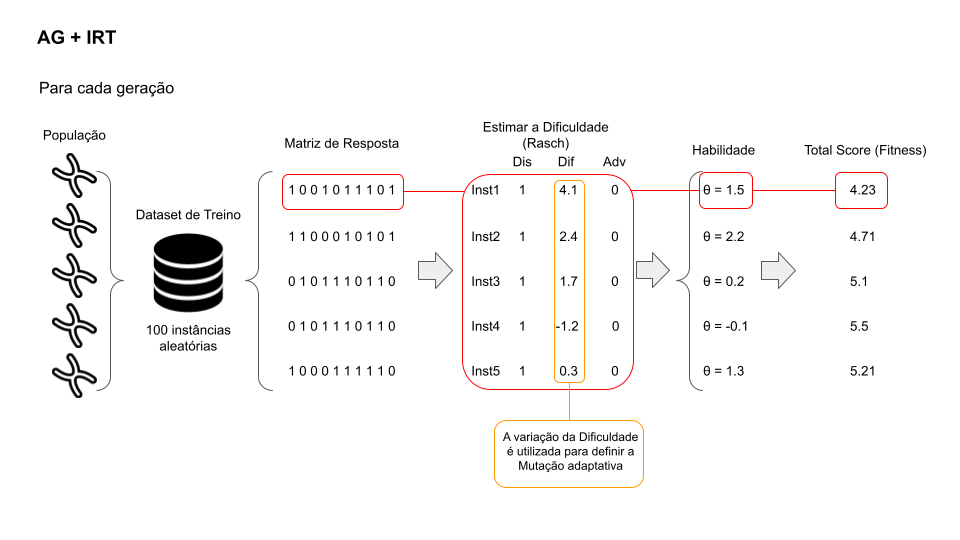

# Cálculo do Fitness

Uma vez que os parâmetros de item e a habilidade do modelo foi estimada, pode-se calcular a probabilidade de acerto para cada instância de treino e então obter o Score total que é a soma da probabilidade de acerto sempre que o modelo acertar e a subtração da probabilidade de erro sempre que o modelo errar. Dessa forma, busca-se tornar mais evidente a separacao de modelos mais habilidosos dos menos habilidosos. E assim, não classificar o individuo somente pela quantidade de acertos (Acurácia), mas também pela qualidade dos acertos (TRI).

# Mutação adaptativa pela TRI

Como a TRI tem a característica de olhar tanto para os itens quanto para os indivíduos, podemos usar os parâmetros de item gerados para entender como está o desempenho total da população de indivíduos utilizada. Para isso, a cada geração é calculado a media da dificuldade normalizada entre 0 e 4, então verifica-se se essa media aumentou ou diminuiu. Caso tenha aumentado, então incrementa-se a probabilidade de mutação e o sigma, caso contrário continua o decaimento exponencial.

# Avaliação do desempenho do AutoML com AG e TRI

Para avaliar se o conjunto de pesos que definem um modelo de Rede Neural encontrado pelo AG é aceitável, é gerado um novo modelo de Rede Neural com os pesos encontrados pelo AG e sem treinamento testa-se a rede com o dataset de teste que foi separado antes de executar o AG. O resultado obtido é comparado com o uma Rede neural treinada normalmente e com a Rede Neural encontrada pelo Autokeras para o dataset em questão.

# Sobre o dataset escolhido

Foi escolhido o dataset [Banknote-Atuthentication](https://www.openml.org/search?type=data&sort=runs&id=1462&status=active) para servir de estudo de caso. O banknote foi escolhido por se tratar de um dataset mais simples com somente 4 features e que serve para testar a metodologia proposta.

# Importa as bibliocas necessarias

In [1]:
!pip install catsim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.4 MB/s 


In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import time
import rpy2
import sys
!pip install openml
import openml
import warnings
warnings.filterwarnings("ignore")
!pip install autokeras
#!wget https://raw.githubusercontent.com/LucasFerraroCardoso/IRT_OpenML/master/decodIRT_MLtIRT.py
#import decodIRT_MLtIRT as MLtIRT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 119 kB 5.2 MB/s 
     |████████████████████████████████| 76 kB 2.5 MB/s 
  Created wheel for openml: filename=openml-0.12.2-py3-none-any.whl size=137326 sha256=171264f8ea35b90771f49353ffe198a37b4bd1f537e5568f6a24bd0fa1860f7b
  Stored in directory: /root/.cache/pip/wheels/6a/20/88/cf4ac86aa18e2cd647ed16ebe274a5dacee9d0075fa02af250
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=d55baf005814277e459a73f53e448957dfb8015cf8f6b8e4e6ea827e5af08f3a
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 46.6 MB/s 


In [3]:
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
from rpy2.robjects.vectors import StrVector
from rpy2.robjects import pandas2ri

utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

#Lista de pacotes R para instalar
#O pacote ltm é usado para o calculo dos parametros do IRT
packnames = ('ltm','ltm')

#Verifica se o pacote ja esta instalado, caso não, instala
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    print('Instalando o pacote ltm do R\n')
    utils.install_packages(StrVector(names_to_install))

#Importa o pacore ltm do R
ltm = rpackages.importr('ltm')
pandas2ri.activate()

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Instalando o pacote ltm do R



R[write to console]: also installing the dependencies ‘mvtnorm’, ‘expm’, ‘admisc’, ‘msm’, ‘polycor’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/mvtnorm_1.1-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 166421 bytes (162 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

# Algoritmo Genetico 

## Funções Gerais do AG

In [4]:
def normalNN(epoch,X_train, y_train,X_test, y_test,l1,l2,l3):

  gnn = GNN(l1=l1,l2=l2,l3=l3)
  gnn.compile_train(epoch,X_train, y_train)
  fitness,_ = gnn.forward_propagation(X_test, y_test)
  return fitness

def testa_gnn(cromossomo,l1,l2,l3,X_test,y_test):

  weights = GNN(l1=l1,l2=l2,l3=l3).returnWeights()
  weights = deconvertPesos(cromossomo,weights)
  gnn = GNN(child_weights=weights,l1=l1,l2=l2,l3=l3)
  fitness,_ = gnn.forward_propagation(X_test, y_test)
  return fitness

def calcIRT(respMatrix):

  import rpy2.robjects.packages as rpackages
  import rpy2.robjects as robjects
  from rpy2.robjects import pandas2ri
  from rpy2.rinterface import RRuntimeWarning
  warnings.filterwarnings("ignore", category=RRuntimeWarning)

  #Importa o pacore ltm do R
  ltm = rpackages.importr('ltm')
  pandas2ri.activate()
  #data = ltm.tpm(respMatrix,type = "rasch",IRT_param = True)
  try:
    data = ltm.rasch(respMatrix, Hessian = True, start_val = 'random')
  except:
    print(respMatrix)

  par = str(data).split('\n')

  key = 0
  count = 0
  lista = []
  for c,i in enumerate(par):
    if i == 'Coefficients:':
      key = 1
    if key == 1:
      if par[c].split() == []:
        break
      if 'Dffclt.V' in par[c].split()[0]:
        for p in par[c+1].split():
          lista.append(p)

  item_param = {}
  for i in range(len(lista)-1):
    item_param['V'+str(i)] = {'Discriminacao':1,'Dificuldade':float(lista[i]),'Adivinhacao':0}

  dataframe = pd.DataFrame.from_dict(item_param)
  dataframe = dataframe.reindex(index = ['Discriminacao','Dificuldade','Adivinhacao'])

  return dataframe.transpose()

def compare(original, res):
  res=np.transpose(res)[0]    
  res = list(map(lambda x: 0 if x<0.5 else 1, res))
  tmp = []
  for i,value in enumerate(original):
    if value == res[i]:
      tmp.append(1)
    else:
      tmp.append(0)
  return tmp

def convertPesos(weights):
  cromossomo = []
  for layer in weights:
    for w in layer:
      for n in w:
        cromossomo.append(n)
  return cromossomo

def deconvertPesos(cromossomo,weights):
  layers = [i.shape for i in weights]
  weights = []
  for l in layers:
    h = l[0]*l[1]
    a = np.array(cromossomo[:h], dtype=np.float32).reshape(l)
    cromossomo = cromossomo[h:]
    weights.append(a)
  return weights

def xavierWeight(n):
  from math import sqrt
  lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
  return [lower,upper]

def calcLimites(weights):
  layers = [i.shape for i in weights]
  ls = [i[0]*i[1] for i in layers]
  cromossomo = convertPesos(weights)
  n_gene = len(cromossomo)
  limites = {}
  for i in range(n_gene):
    if i < ls[0]:
      limites[i] = xavierWeight(ls[0])
    if i >= ls[0] and i < ls[0]+ls[1]:
      limites[i] = xavierWeight(ls[1])
    elif i >= ls[0]+ls[1]:
      limites[i] = xavierWeight(ls[2])
  
  return n_gene, limites


def fitFunction(cromossomo, X_train, y_train, layers):
  tmp_gnn = GNN(l1=layers[0],l2=layers[1],l3=layers[2])
  weights = tmp_gnn.returnWeights()
  weights = deconvertPesos(cromossomo,weights)
  tmp_gnn = GNN(weights,l1=layers[0],l2=layers[1],l3=layers[2])
  fitness,resp = tmp_gnn.forward_propagation(X_train, y_train)
  return fitness,resp

def getResp(cromossomo, X_train, y_train, layers):
  tmp_gnn = GNN(l1=layers[0],l2=layers[1],l3=layers[2])
  weights = tmp_gnn.returnWeights()
  weights = deconvertPesos(cromossomo,weights)
  tmp_gnn = GNN(weights)
  fitness = tmp_gnn.forward_propagation(X_train, y_train)
  return fitness

class GNN(Sequential):
  # Construtor
  def __init__(self, child_weights=None, l1=4, l2=2, l3=1):
      # Inicializa Sequential Model Super Class
      super().__init__()
      # Se nenhum peso foi passado, gera-se os pesos aleatoriamente
      if child_weights is None:
          # As camadas sao criadas e geradas aleatoriamente
          layer1 = Dense(l1, input_shape=(l1,), activation='sigmoid')
          layer2 = Dense(l2, activation='sigmoid')
          layer3 = Dense(l3, activation='sigmoid')
          # Camadas sao adicionadas ao modelo
          self.add(layer1)
          self.add(layer2)
          self.add(layer3)
      # Se os pesos forem providenciados, entao adiciona-os nas camadas
      else:
          # Seta os pesos nas camadas
          self.add(
              Dense(
                  l1,
                  input_shape=(l1,),
                  activation='sigmoid',
                  weights=[child_weights[0], np.zeros(l1)])
              )
          self.add(
              Dense(
                l2,
                activation='sigmoid',
                weights=[child_weights[1], np.zeros(l2)])
          )
          self.add(
              Dense(
                l3,
                activation='sigmoid',
                weights=[child_weights[2], np.zeros(l3)])
          )
      #Define

  # Funcao de forward propagation
  def forward_propagation(self, X_train, y_train):
      # Forward propagation
      y_hat = self.predict(X_train)
      # Calcula o fitness
      self.fitness = accuracy_score(y_train, y_hat.round())
      return self.fitness, y_hat

  # Backpropagation
  def compile_train(self, epochs, X_train, y_train):
      self.compile(
                    optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy']
                    )
      self.fit(X_train, y_train, epochs=epochs)
  
  def returnWeights(self):
    weights = []
    for layer in self.layers:
      weights.append(layer.get_weights()[0])
    return weights

class individuo():
  def __init__(self,n_gene=None, limites=None):
    self.n_gene = n_gene
    self.limites = limites
    if self.n_gene == None:
      self.cromossomo = None
    else:
      self.cromossomo = self.geraInd()
    self.fitness = None
    self.resp = []

  def getInd(self):
    return self.cromossomo
  
  def getFitness(self):
    return self.fitness

  def geraInd(self):
    tmp = np.random.uniform(0,1,self.n_gene)
    return [p for p in tmp]
  
  def calcResp(self,fitFunction,X_train=None,y_train=None,layers=None):
    cromo_decode = self.decodeInd()
    self.fitness,self.resp = fitFunction(cromo_decode,X_train,y_train,layers)
    self.resp = compare(y_train, self.resp)
  
  def calcFitness(self,fitFunction,palavraAlvo=None,X_train=None,y_train=None,layers=None, irt=[]):
    cromo_decode = self.decodeInd()
    if len(irt) != 0:
      self.fitness = fitFunction(self.resp,irt,self.fitness)
    elif palavraAlvo != None:
      self.fitness = fitFunction(cromo_decode,palavraAlvo)
    elif type(X_train) != type(None) and type(y_train) != type(None):
      self.fitness = fitFunction(cromo_decode,X_train,y_train,layers)
    else:
      self.fitness = fitFunction(cromo_decode)
  
  def ConvertXiValue(self,X,limite):
    LB,UB = limite[0],limite[1]
    return LB + (UB-LB)*X
  
  def DeconvertXiValue(self,value,limite):
    LB,UB = limite[0],limite[1]
    return (value-LB)/(UB-LB)
  
  def decodeInd(self):
    tmp = []
    for c,gene in enumerate(self.cromossomo):
      tmp.append(self.ConvertXiValue(gene,self.limites[c]))
    return tmp[:]

  def encodeInd(self):
    tmp = []
    for c,gene in enumerate(self.cromossomo):
      tmp.append(self.DeconvertXiValue(gene,self.limites[c]))
    return tmp[:]
  
  def mutacaoGauss(self,sigma,probMut):
    for gene in range(self.n_gene):
      if np.random.random() < probMut:
        gene_i = sigma * np.random.randn(1, 1) + self.cromossomo[gene]
        self.cromossomo[gene] = gene_i[0][0]

  # Funcao para mutacao dos pesos
  def mutation(child_weights):
      # Add chance de mutacao aletoria
      selection = random.randint(0, len(child_weights)-1)
      mut = random.uniform(0, 1)
      if mut >= .5:
          child_weights[selection] *= random.randint(2, 5)
      else:
          # Sem mutacao
          pass
  
  def __str__(self):
    return "fit:"+str(self.fitness)+" Genes:"+"".join(["{0:.3f} ".format(gene) for gene in self.cromossomo])

  def __eq__(self, other):
    return (self.fitness == other.fitness)

  def __lt__(self, other):
    return (self.fitness < other.fitness)

  def __gt__(self, other):
    return (self.fitness > other.fitness)


class populacao():
  def __init__(self,n_pop,n_gene,limites):
    self.n_pop = n_pop
    self.n_gene = n_gene
    self.limites = limites
    self.pop = []
    self.respMatrix = []

  def appendPop(self,indi):
    self.pop.append(indi)
  
  def geraPop(self):
    self.pop = [individuo(self.n_gene,self.limites) for i in range(self.n_pop)]

  def decodePop(self):
    tmp = []
    for i in range(self.n_pop):
      tmp.append(self.pop[i].decodeInd())
    return tmp
  
  def encodePop(self):
    tmp = []
    for i in range(self.n_pop):
      tmp.append(self.pop[i].encodeInd())
    return tmp
  
  def calcPopFitness(self, fitFunction,palavraAlvo = None, X_train=None,y_train=None,layers=None,irt=[]):
    for i in range(self.n_pop):
      self.pop[i].calcFitness(fitFunction,palavraAlvo,X_train,y_train,layers,irt)

  def calcPopResp(self, fitFunction, X_train=None,y_train=None,layers=None):
    self.respMatrix = []
    X_t, _, y_t, _ = train_test_split(X_train, y_train,stratify=y_train,shuffle=True,train_size=100)
    for i in range(self.n_pop):
      self.pop[i].calcResp(fitFunction,X_t,y_t,layers)
      self.respMatrix.append(self.pop[i].resp)
  
  def calcIRT(self):
    tmp = {}
    for i in range(len(self.respMatrix)):
      tmp['Model '+str(i)] = self.respMatrix[i]
    #print(tmp)
    df = pd.DataFrame.from_dict(tmp,orient='index',columns=['V'+str(i) for i in range(len(self.respMatrix[0]))])
    #df.to_csv('tmp.csv')
    #time.sleep(1)
    irt_param = calcIRT(df).to_numpy()
    col = np.ones((len(irt_param), 1))
    self.irt_param = np.append(irt_param, col, axis = 1)
    return self.irt_param
    
  
  def sortPop(self,reverse=True):
    tmp = [(i.fitness,i.cromossomo,i) for i in self.pop]
    tmp.sort(key=lambda x: x[0],reverse=reverse)
    tmp_pop = [i[2] for i in tmp]
    self.pop = tmp_pop
  
  def mutaPop(self,sigma,probMut):
    for indi in self.pop:
      indi.mutacaoGauss(sigma,probMut)
  
  def printPop(self):
    for i in self.pop:
      print(i)

class GA():
  def __init__(self,n_pop,n_gene,limites):
    self.n_pop = n_pop
    self.n_gene = n_gene
    self.limites = limites
    if n_pop <= 10:
      self.Ring = 2
    else:
      self.Ring = int(n_pop*0.2)
    self.geracao = 0
    self.best = None
    self.fitHist = []
    self.allTime_best = None
    self.pop = []
    self.irtHist = []
    self.mut_values = []
  
  def torneio(self,pop,reverse=True):
    ring = []
    pop_tmp = pop.copy()
    for _ in range(self.Ring):
      indi = random.choice(pop_tmp)
      #while(indi in ring):
      #  indi = random.choice(self.pop)
      ring.append(indi)
      pop_tmp.remove(indi)

      ring.sort(key=lambda x: x.fitness, reverse=reverse)

    return copy.deepcopy(ring[-1])
  
  def crossAritmetico(self, pai1, pai2, pc):
    """Realiza crossover aritmetico em todos os genes do cromossomo"""
    beta = np.random.random()
    #print(beta)
    #print(pai1.cromossomo)
    novogene1 = beta * np.array(pai1.cromossomo) + (1 - beta) * np.array(pai2.cromossomo)
    novogene2 = (1 - beta) * np.array(pai1.cromossomo) + beta * np.array(pai2.cromossomo)
    novocromo1 = individuo()
    novocromo2 = individuo()
    novocromo1.cromossomo = [i for i in novogene1]
    novocromo2.cromossomo = [i for i in novogene2]
    return novocromo1, novocromo2
  
  def crossAritmeticoCorte(self, pai1, pai2, pc):
    """Realiza crossover aritmetico em todos os genes do cromossomo"""
    beta = np.random.random()
    corte = np.random.randint(self.n_gene)
    if np.random.random() < pc:
    
      novogene1 = np.concatenate( ( np.array(pai1.cromossomo[:corte]) , beta * np.array(pai1.cromossomo[corte:])   + (1 - beta) * np.array(pai2.cromossomo[corte:])))
      novogene2 = np.concatenate( ( np.array(pai2.cromossomo[:corte]) , beta * np.array(pai2.cromossomo[corte:])   + (1 - beta) * np.array(pai1.cromossomo[corte:])))
      novocromo1 = individuo(self.n_gene,self.limites)
      novocromo2 = individuo(self.n_gene,self.limites)
      novocromo1.cromossomo = [i for i in novogene1]
      novocromo2.cromossomo = [i for i in novogene2]
      return novocromo1, novocromo2

    else:
      return pai1,pai2
  
  def decreaseRate(self,value,rate,tempo):
    return value*(1 - rate)**tempo
  
  def increaseRate(self,value,rate,tempo):
    return value*(1 + rate)**tempo
  
  def condParada(self,anterior,atual):
    return abs(anterior-atual)/atual
  
  def countGeracao(self):
    self.geracao += 1
  
  def appendHistFit(self,pop):
    fit = [i.fitness for i in pop]
    return fit
  
  def tabelaFinal(self,pop,n_ind):
    tmp_dict = {}
    for i in range(n_ind):
      tmp = {}
      tmp['fitness'] = pop[-1-i].fitness
      genes = pop[-1-i].decodeInd()
      for c,gene in enumerate(genes):
        tmp['X'+str(c+1)] = gene
      
      tmp_dict[i] = tmp
    return tmp_dict
  
  def fitFunctionIRT(self,resp,irt_param,e_theta):
    from catsim.estimation import NumericalSearchEstimator
    from catsim.irt import icc_hpc

    adm_items = [i for i in range(len(irt_param))]
    
    item_resp = [True if i == 1 else False for i in resp]
    
    theta = NumericalSearchEstimator().estimate(items=irt_param, 
                                                administered_items= adm_items, 
                                                response_vector=item_resp,
                                                est_theta=e_theta)
    
    list_prob = list(icc_hpc(theta,irt_param))
    soma = 0
    for i,inst in enumerate(resp):
      if inst == 1:
        soma += list_prob[i]
      else:
        soma += (1- list_prob[i])*-1

    return soma

  def normalize(self,x,between):
    a,b = between
    tmp = []
    for i in x:
      v = (b-a)*(i - min(x)) / (max(x) - min(x)) + a
      tmp.append(v)
    return tmp

  def check_irt(self,irt_old,irt_new):
    l = self.normalize([b[1] for b in irt_old],(0,4))
    media1 = np.mean(l)
    l = self.normalize([b[1] for b in irt_new],(0,4))
    media2 = np.mean(l)
    
    if media1 >= media2:
      return False
    else:
      return True

  def run(self,fitFunction,sigma,probMut,pc,delta,max_iter,best_value,decreaseRate,palavraAlvo=None,X_train=None,y_train=None,layers=None,reverse=True,irt=True):
    self.sigma = sigma
    self.probMut = probMut
    
    print("Cria a populacao")
    self.pop = populacao(self.n_pop,self.n_gene,self.limites)
    self.pop.geraPop()
    self.pop.printPop()
    if irt:
      self.pop.calcPopResp(fitFunction,X_train, y_train,layers)
      self.pop.calcIRT()
      print(self.pop.irt_param)
      self.pop.calcPopFitness(self.fitFunctionIRT,palavraAlvo,X_train, y_train,layers,self.pop.irt_param)
      self.irtHist.append(self.pop.irt_param)
    else:
      self.pop.calcPopFitness(fitFunction,palavraAlvo,X_train, y_train,layers)
    self.pop.printPop()
    self.pop.sortPop(reverse)
    self.pop.printPop()

    self.best = self.pop.pop[-1]
    self.allTime_best = self.best
    count_stagnation = 0
    count_increase = 0

    while count_stagnation < max_iter or self.best.fitness < best_value:  
      print(self.geracao)
      self.countGeracao()

      pop_tmp = populacao(self.n_pop,self.n_gene,self.limites)
      for i in range(0,self.n_pop):
        #print("torneio. seleciona pais")

        pai1 = self.torneio(self.pop.pop,reverse)
        pai2 = self.torneio(self.pop.pop,reverse)
        #print(pai1,pai2)

        filho1,filho2 = self.crossAritmeticoCorte(pai1,pai2,pc)
        pop_tmp.appendPop(filho1)

      self.pop.pop = pop_tmp.pop.copy()

      self.pop.mutaPop(self.sigma,self.probMut)

      if irt:
        self.pop.calcPopResp(fitFunction,X_train, y_train,layers)
        self.pop.calcIRT()
        #print(pop.irt_param)
        self.pop.calcPopFitness(self.fitFunctionIRT,palavraAlvo,X_train, y_train,layers,self.pop.irt_param)
        irt_key = self.check_irt(self.irtHist[-1],self.pop.irt_param)
        self.irtHist.append(self.pop.irt_param)
      else:
        self.pop.calcPopFitness(fitFunction,palavraAlvo,X_train, y_train,layers)
      self.pop.sortPop(reverse)

      var_fitness = self.condParada(self.pop.pop[-1].fitness,self.best.fitness)
      self.fitHist.append(self.appendHistFit(self.pop.pop))
      #pop.printPop()

      if self.pop.pop[-1].fitness > self.best.fitness:
        print(self.pop.pop[-1].__str__())
      self.best = self.pop.pop[-1]

      if self.best.fitness > self.allTime_best.fitness:
        self.allTime_best = copy.deepcopy(self.best)

      if var_fitness < delta or np.isnan(var_fitness):
        count_stagnation += 1
      if count_stagnation == max_iter:
        print('Estagnou:',self.geracao)
        pop_encode = self.pop.decodePop()
        print(pop_encode[-1])
        print(self.pop.pop[-1].fitness)
        break

      self.mut_values.append([self.sigma,self.probMut])
      if irt:
        if irt_key:
          self.sigma = self.increaseRate(self.sigma, decreaseRate, count_increase)
          self.probMut = self.increaseRate(self.probMut, decreaseRate, count_increase)
          print('Increase pm e sigma',self.probMut,self.sigma)
          count_increase += 1
        else:
          count_increase = 0
          self.sigma = self.decreaseRate(self.sigma, decreaseRate, self.geracao)
          self.probMut = self.decreaseRate(self.probMut, decreaseRate, self.geracao)
      else:
        self.sigma = self.decreaseRate(self.sigma, decreaseRate, self.geracao)
        self.probMut = self.decreaseRate(self.probMut, decreaseRate, self.geracao)
      #print(sigma, probMut)
    print(self.best.__str__())
    print(self.allTime_best.__str__())
    self.pop.decodePop()
    return self.fitHist, self.tabelaFinal(self.pop.pop,1)

In [25]:
def plotResultadoFinal(resultado,result_comp=False):
  if result_comp != False:
    resultado_comp = result_comp[:]
  else:
    resultado_comp = result_comp
  resultado_final = resultado[:]
  indi = {0:'20',1:'30',2:'50'}
  for g,pop in enumerate(resultado_final):
    maior = max([len(i) for i in pop])
    if resultado_comp != False:
      maior2 = max([len(i) for i in resultado_comp[g]])
    else:
      maior2 = 0
    
    if maior2 > maior:
      maior = maior2

    for i in pop:
      ultimo = i[-1]
      for j in range(maior-len(i)):
        i.append(ultimo)
    
    if resultado_comp != False:
      for i in resultado_comp[g]:
        ultimo = i[-1]
        for j in range(maior-len(i)):
          i.append(ultimo)

    if resultado_comp != False:
      resultados = [pop,resultado_comp[g]]
    else:
      resultados = [pop]

    fig, ax = plt.subplots()
    fig.set_size_inches(16.5, 8.5)

    for n,res in enumerate(resultados):
      dici = {'fitness':[],'minimo':[],'maximo':[],'D.Padrao':[]}
      x =[]
      
      for gen in range(maior):
        x.append(gen)
        lista = [i[gen] for i in res]
        lista = [i[-1] for i in lista]
        #print(gen)
        #print(lista)
        #print(res)
        #print(np.mean(lista))
        #import sys
        #sys.exit()
        dici['fitness'].append(np.mean(lista))
        dici['minimo'].append(np.mean(lista)-np.std(lista))
        dici['maximo'].append(np.mean(lista)+np.std(lista))
        dici['D.Padrao'].append(np.std(lista))

        dataset = pd.DataFrame.from_dict(dici)
      
      if n == 0:
        ax.plot(x,dici['fitness'],'bo-',label='GA',alpha=.6)
        ax.fill_between(x, dici['minimo'], dici['maximo'], color='b', alpha=.1)
        text_distance = (0,10)
      else:
        ax.plot(x,dici['fitness'],'ro-',label='RW',alpha=.6)
        ax.fill_between(x, dici['minimo'], dici['maximo'], color='r', alpha=.1)
        text_distance = (0,-30)
      fig.suptitle('Grafico de convergencia pop='+str(indi[g]), fontsize=20)
      plt.xlabel('geracoes ('+str(maior)+')', fontsize=16)
      plt.ylabel('fitness', fontsize=16)

      count = 0
      mod = int(maior*0.1)
      for X,Y in zip(x,dici['fitness']):

        label = "{:.2f} \n {:.2f}".format(Y,dici['D.Padrao'][count])
        

        if count % mod == 0:

          plt.annotate(label, # this is the text
                        (X,Y), # these are the coordinates to position the label
                        textcoords="offset points", # how to position the text
                        xytext=text_distance, # distance from text to points (x,y)
                        ha='center') # horizontal alignment can be left, right or center
        count += 1
    ax.legend(loc='upper right', frameon=False)
    plt.show()

In [33]:
def printTabela(tabela_final_caso):
  genes = []
  for i in tabela_final_caso[0][0]:
    for p in tabela_final_caso[0][0][i]:
      #if p != 'fitness':
      genes.append(p)

  list_caso = []
  for caso in tabela_final_caso:
    dict_gene = {}
    for execucao in caso:
      for gene in genes:
        if gene not in dict_gene:
          dict_gene[gene] = []
        dict_gene[gene].append(execucao[0][gene])
    list_caso.append(dict_gene.copy())

  media = {}
  indi = {0:'20',1:'30',2:'50'}
  for c,caso in enumerate(list_caso):
    media[indi[c]] = {}
    for gene in caso:
      media[indi[c]][gene+"_media"] = np.mean(caso[gene])
      media[indi[c]][gene+'_stdev'] = np.std(caso[gene])
  
  df = pd.DataFrame.from_dict(media).transpose()
  print(df)

def tabAcc(acc_final):
  media = {}
  indi = {0:'20',1:'30',2:'50'}
  for c,acc in enumerate(acc_final):
    lista1 = [i[1] for i in acc]
    lista2 = [i[2] for i in acc]

    media[indi[c]] = {}
    media[indi[c]]['NN_AG_media'] = np.mean(lista1)
    media[indi[c]]['NN_AG_stdev'] = np.std(lista1)
    media[indi[c]]['NN_treinada_media'] = np.mean(lista2)
    media[indi[c]]['NN_treinada_stdev'] = np.std(lista2)

  df = pd.DataFrame.from_dict(media).transpose()
  print(df)

## Experimento com o dataset [Banknote](https://www.openml.org/search?type=data&sort=runs&id=1462&status=active)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Lê o dataset do openml
# credit-approval id 29
# banknote id 1462
dataset = openml.datasets.get_dataset(1462)
X, y, categorical_indicator, attribute_names = dataset.get_data(
                dataset_format='array',
                target=dataset.default_target_attribute)

#Verifica a existencia de valores NaN e substitui por 0
if len(np.where(np.isnan(X))[0]) > 0:
  X = np.nan_to_num(X)

# Cria o split de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,random_state=42,shuffle=True,test_size=0.3)
# Define o numero de nos das camadas
l1 = len(X[0])
l2 = len(X[0])*2
l3 = 1

gnn = GNN(l1=l1,l2=l2,l3=l3)
weights = gnn.returnWeights()
n_gene,limites = calcLimites(weights)
probMut = 0.9
sigma = 0.8
delta = 0.05
max_iter = 20
decreaseRate = 0.0005
pops = [20,30,50]
pc = 0.9
best_value = 100

resultado_final_caso = []
tabela_final_caso = []
acc_final = []

In [5]:
for pop in pops:
  resultado_final_tmp = []
  tabela_final_tmp = []
  acc_final_tmp = []
  count = 0
  while count < 5:
    ga = GA(pop,n_gene,limites)
    try:
      resultado, tabela = ga.run(fitFunction,sigma,probMut,pc,delta,max_iter,best_value,decreaseRate,palavraAlvo=None,X_train=X_train,y_train=y_train,layers=[l1,l2,l3],reverse=False)
    except:
      if ga.geracao < 20:
        continue 
      ga.pop.decodePop()
      resultado = ga.fitHist
      tabela = ga.tabelaFinal(ga.pop.pop,1)
    resultado_final_tmp.append(resultado)
    tabela_final_tmp.append(tabela)

    #Aqui é feito o teste com o melhor individuo encontrado pelo AG com o Dataset
    #de teste. Também é gerado um modelo treinado normalmente para comparaçao
    acc_final_tmp.append([testa_gnn(ga.best.decodeInd(),l1,l2,l3,X_test,y_test),
                          testa_gnn(ga.allTime_best.decodeInd(),l1,l2,l3,X_test,y_test),
                          normalNN(50,X_train, y_train,X_test, y_test,l1,l2,l3)])
    count += 1
  resultado_final_caso.append(resultado_final_tmp[:])
  tabela_final_caso.append(tabela_final_tmp[:])
  acc_final.append(acc_final_tmp[:])

A saída de streaming foi truncada nas últimas 5000 linhas.
 [ 1.    -4.436  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.     4.437  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4.436  0.     1.   ]
 [ 1.    -4

## Grafico de convergencia do AG

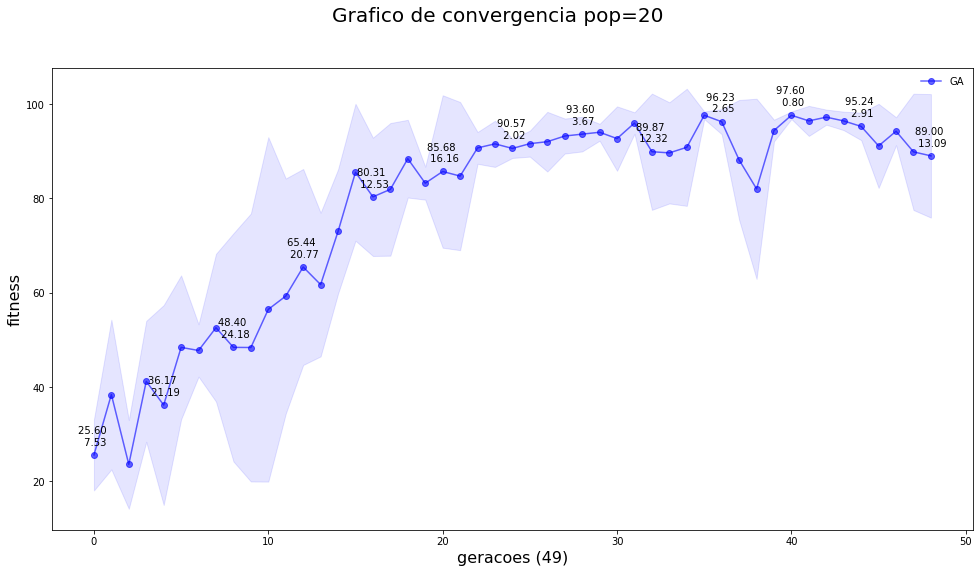

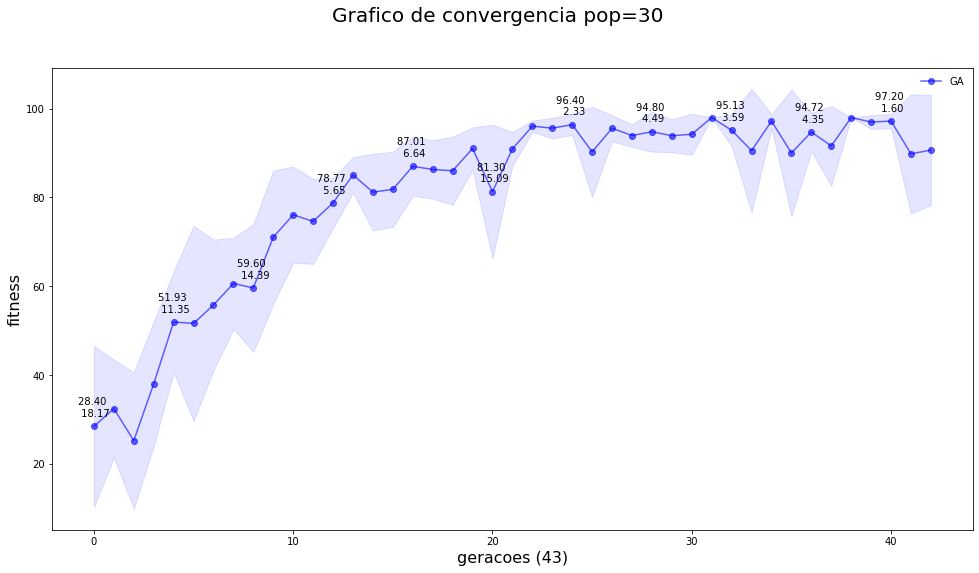

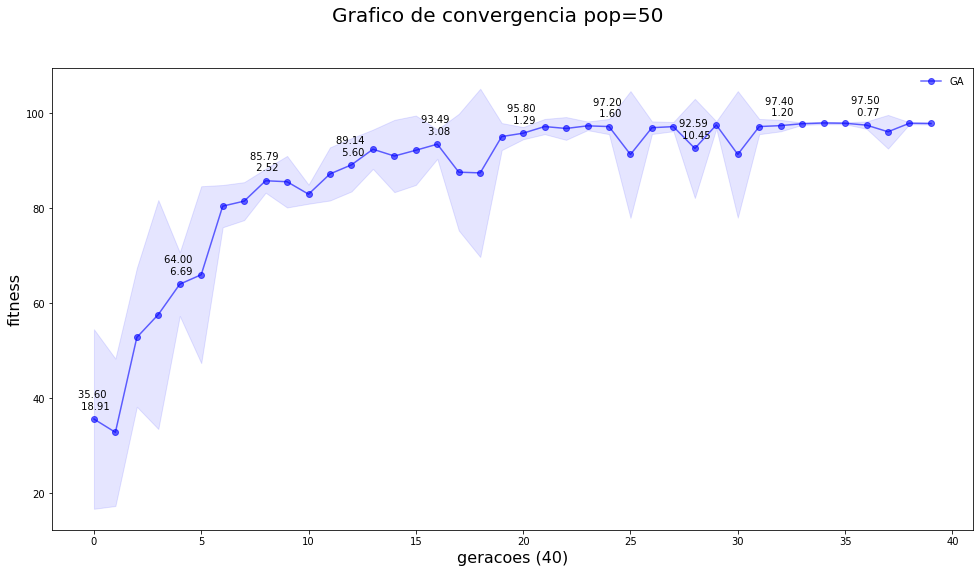

In [27]:
plotResultadoFinal(resultado_final_caso)

## Tabela Final com o Fitness encontrado para cada população (20,30,50)

Percebe-se que a medida que o numero de individuos aumenta, tanto o fitness quanto o desvio padrão melhoram.

In [28]:
printTabela(tabela_final_caso)

    fitness_media  fitness_stdev  X1_media  X1_stdev  X2_media  X2_stdev  \
20      88.996206      13.091881 -0.787143  2.309791 -2.346735  0.675800   
30      90.675628      12.435086 -0.916128  4.324162 -1.709668  3.894986   
50      97.848866       0.202276  0.120336  2.809612 -2.083062  1.493023   

    X3_media  X3_stdev  X4_media  X4_stdev  ...  X52_media  X52_stdev  \
20 -0.991898  1.476175 -1.594645  1.465357  ...  -0.595818   2.092047   
30  1.230583  2.498939 -1.780384  2.655907  ...  -0.644375   1.686769   
50 -1.507072  1.731185 -1.081900  1.438248  ...  -0.777561   2.720592   

    X53_media  X53_stdev  X54_media  X54_stdev  X55_media  X55_stdev  \
20   1.464169   3.090621   0.980197   3.003160  -0.042332   2.465491   
30   0.865107   0.965623   0.898820   1.431623   1.039469   1.518000   
50   1.387459   1.607748  -0.588056   3.511605  -0.978450   1.182110   

    X56_media  X56_stdev  
20  -0.786850   2.501228  
30   0.140071   2.628604  
50  -0.395731   2.713304  

[3 r

# Teste comparacao do modelo Final encontrado pelo AG com um modelo treinado normalmente

O modelo final gerado pelo AG demonstra ser competitivo com uma Rede Neural treinada nas mesmas condiçoes (nº de camadas e pesos iguais).

In [32]:
tabAcc(acc_final)

    NN_AG_media  NN_AG_stdev  NN_treinada_media  NN_treinada_stdev
20     0.974272     0.022171           0.985922           0.002831
30     0.983010     0.006691           0.985437           0.003070
50     0.988350     0.006761           0.988835           0.003944


# Teste com o AtutoKeras

Como pode ser observado, o autoKeras conseguiu encontrar um modelo ótimo para o problema do dataset. Isso já era esperado dado a simplicidade do dataset. Mas é interessante observar que o AG proposto conseguiu encontrar um modelo com desempenho quase ótimo, porém com uma Rede Neural muito mais simples. 

In [19]:
from autokeras import StructuredDataClassifier

# define the search
search = StructuredDataClassifier(max_trials=8)
# perform the search
search.fit(x=X_train, y=y_train,epochs=10, verbose=0)
# evaluate the model
loss, acc = search.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

# get the best performing model
model = search.export_model()
# summarize the loaded model
model.summary()

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/10
30/30 [==============================] - 1s 3ms/step - loss: 0.2450 - accuracy: 0.9292
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9854
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9969
Epoch 4/10
30/30 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
30/30 [==============================] - 0s 3ms/step - loss: 8.1217e-04 - accuracy: 1.0000
Epoch 10/10
30/30 [==============================] - 0s 3ms/step - loss: 6.4444e-04 - accuracy: 1.0000
INFO:tensor

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


Accuracy: 1.000
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 4)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                160       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)      

In [21]:
print('Parâmetros da Rede Neural utilizada pelo AG')
weights = GNN(l1=l1,l2=l2,l3=l3).returnWeights()
weights = deconvertPesos(ga.best.decodeInd(),weights)
gnn = GNN(child_weights=weights,l1=l1,l2=l2,l3=l3)
gnn.summary()

Parâmetros da Rede Neural utilizada pelo AG
Model: "gnn_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 8)                 40        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


# Considerações Finais

O dempenho do modelo de Rede Neural encontrado pelo AG com TRI demonstra ser competitivo quando comparado com uma NN treinada normalmente e com um modelo gerado pelo AutoKeras. Porém, vale ressaltar que o dataset utilizado como validação da metodologia é simples, seria interessante testar com um conjunto de dados de maior complexidade para entender quais as limitacoes dessa proposta.